#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:

# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *

# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL2_Z3_2 = TDL_Class.TDL()
TDL2_Z3_2.initialize_TDL(3200,4800,2)

[3208 3209 3210 3211 3212 3213 3214 3215 3232 3233 3234 3235 3236 3237
 3238 3239 3256 3257 3258 3259 3260 3261 3262 3263 3280 3281 3282 3283
 3284 3285 3286 3287 3304 3305 3306 3307 3308 3309 3310 3311 3328 3329
 3330 3331 3332 3333 3334 3335 3352 3353 3354 3355 3356 3357 3358 3359
 3376 3377 3378 3379 3380 3381 3382 3383 3400 3401 3402 3403 3404 3405
 3406 3407 3424 3425 3426 3427 3428 3429 3430 3431 3448 3449 3450 3451
 3452 3453 3454 3455 3472 3473 3474 3475 3476 3477 3478 3479 3496 3497
 3498 3499 3500 3501 3502 3503 3520 3521 3522 3523 3524 3525 3526 3527
 3544 3545 3546 3547 3548 3549 3550 3551 3568 3569 3570 3571 3572 3573
 3574 3575 3592 3593 3594 3595 3596 3597 3598 3599 3616 3617 3618 3619
 3620 3621 3622 3623 3640 3641 3642 3643 3644 3645 3646 3647 3664 3665
 3666 3667 3668 3669 3670 3671 3688 3689 3690 3691 3692 3693 3694 3695
 3712 3713 3714 3715 3716 3717 3718 3719 3736 3737 3738 3739 3740 3741
 3742 3743 3760 3761 3762 3763 3764 3765 3766 3767 3784 3785 3786 3787
 3788 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_2_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_2_POR1.csv'.

There are 199 tapped bins and 190 untapped = 389 = 389

Tapped is: 51.16% 



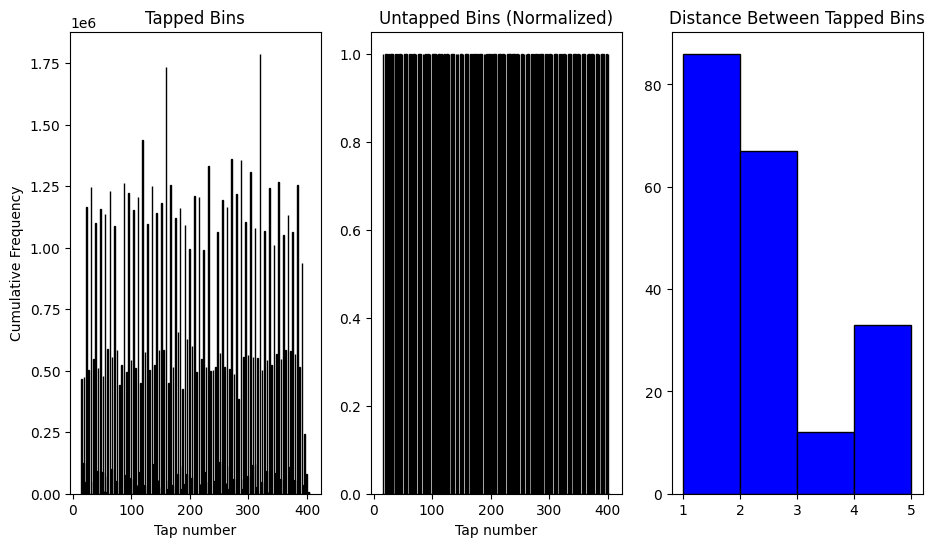

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch2_Z3_2_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL2_Z3_2.perform_POR()
to_print1 = TDL2_Z3_2.get_logical_assignments()
error_lib1 = TDL2_Z3_2.build_initial_error_lib()


Present taps: 
 [ 15  17  18  19  21  23  26  27  31  34  35  39  41  42  43  47  49  50
  51  53  55  57  58  59  63  65  66  67  71  73  74  75  79  81  82  83
  85  87  90  91  95  97  98  99 103 106 107 109 111 113 114 115 117 119
 122 123 127 129 130 131 135 137 138 139 141 143 145 146 147 149 151 153
 154 155 159 161 162 163 167 170 171 175 178 179 183 185 186 187 189 191
 193 194 195 199 202 203 207 209 210 211 215 217 218 219 223 225 226 227
 229 231 234 235 239 242 243 247 249 250 251 253 255 257 258 259 261 263
 265 266 267 271 274 275 279 282 283 287 289 290 291 295 297 298 299 301
 303 305 306 307 311 313 314 315 319 321 322 323 327 329 330 331 333 335
 337 338 339 343 345 346 347 351 353 354 355 359 361 362 363 365 367 369
 370 371 375 377 378 379 381 383 385 386 387 391 393 394 395 399 401 402
 403] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'ge

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL2_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL2_Z3_2.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2), np.int64(3), np.int64(4)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]

Logical bin assignment: 

{0: np.int64(3208), 1: np.int64(3209), 2: np.int64(3210), 3: np.int64(3211), 4: np.int64(3212), 5: np.int64(3213), 6: np.int64(3214), 7: np.int64(3215), 8: np.int64(3232), 9: np.int64(3233), 10: np.int64(3234), 11: np.int64(3235), 12: np.int64(3236), 13: np.int64(3237), 14: np.int64(3238), 15: np.int64(3239), 16: np.int64(3256), 17: np.int64(3257), 18: np.int64(3258), 19: np.int64(3259), 20: np.int64(3260), 21: np.int64(3261), 22: np.int64(3262), 23: np.int64(3263), 24: np.int64(3280), 25: 

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_2_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_2_POR2.csv'.

There are 366 tapped bins and 22 untapped = 388 = 388

Tapped is: 94.33% 



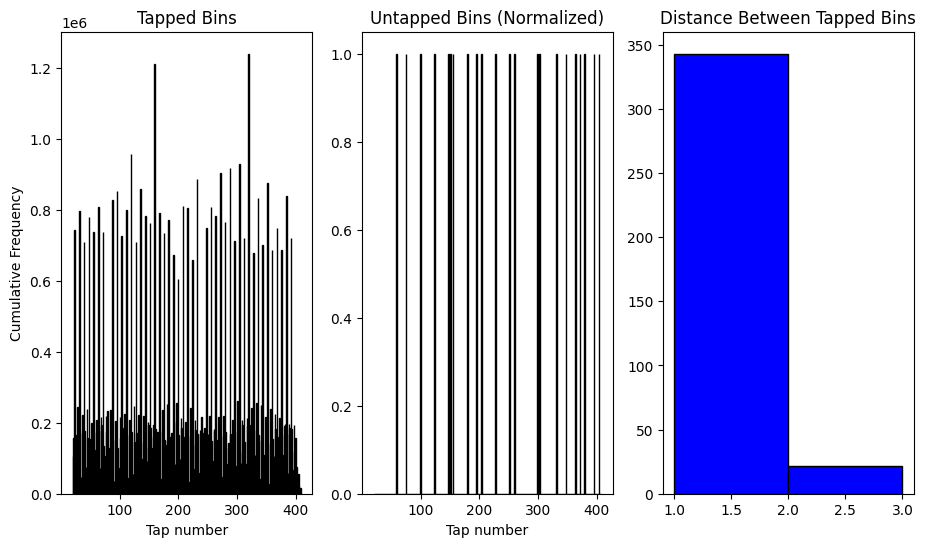

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_2_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL2_Z3_2.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 148 149 151
 152 153 154 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 196 197 198 199 200 201 202 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 252 253 254 255 256 257 258 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 27

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL2_Z3_2.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL2_Z3_2.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(5), np.int64(6), np.int64(7), np.int64(8))):[2, 1, 3, 4, 8, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1),

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_2_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_2_POR3.csv'.

There are 389 tapped bins and 2 untapped = 391 = 391

Tapped is: 99.49% 



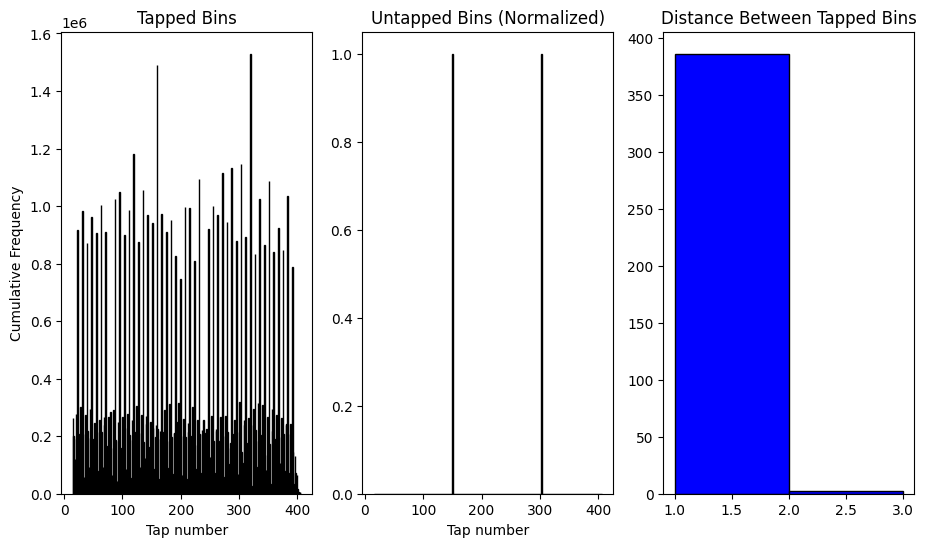

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250423/Unsync1_Ch2_Z3_2_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL2_Z3_2.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL2_Z3_2.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL2_Z3_2.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 25

KeyError: ((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(8)))

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 

((np.int64(8),), (np.int64(8),), (np.int64(8),)):(8,)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(

# Code Density Test

In [13]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL2_Z3_2.npz", cdc_to_pass = cdc_to_pass)

In [14]:
print(cdc_to_pass)

{np.int64(3257): np.float64(12.431091688484928), np.int64(3256): np.float64(9.547093584717), np.int64(3258): np.float64(0.007157381396176406), np.int64(3259): np.float64(5.740741278378232), np.int64(3263): np.float64(4.739987679587024e-05), np.int64(3261): np.float64(13.147019427609752), np.int64(3260): np.float64(9.085418784725224), np.int64(3262): np.float64(2.187362114499024), np.int64(3281): np.float64(43.371503466619615), np.int64(3282): np.float64(9.792814546026792), np.int64(3280): np.float64(1.3859249976344499), np.int64(3287): np.float64(2.579690894738442), np.int64(3283): np.float64(0.10930411589127677), np.int64(3285): np.float64(14.309122207014104), np.int64(3286): np.float64(8.49012373204589), np.int64(3284): np.float64(0.7307165006851356), np.int64(3305): np.float64(46.60910465128474), np.int64(3306): np.float64(9.88671370195941), np.int64(3304): np.float64(1.8931510792270574), np.int64(3311): np.float64(2.8001477217160344), np.int64(3307): np.float64(0.012560967350905613

In [12]:
print(to_print2)

{0: np.int64(3208), 1: np.int64(3209), 2: np.int64(3210), 3: np.int64(3211), 4: np.int64(3212), 5: np.int64(3213), 6: np.int64(3214), 7: np.int64(3215), 8: np.int64(3232), 9: np.int64(3233), 10: np.int64(3234), 11: np.int64(3235), 12: np.int64(3236), 13: np.int64(3237), 14: np.int64(3238), 15: np.int64(3239), 16: np.int64(3257), 17: np.int64(3256), 18: np.int64(3258), 19: np.int64(3259), 20: np.int64(3263), 21: np.int64(3261), 22: np.int64(3260), 23: np.int64(3262), 24: np.int64(3281), 25: np.int64(3282), 26: np.int64(3280), 27: np.int64(3287), 28: np.int64(3283), 29: np.int64(3285), 30: np.int64(3286), 31: np.int64(3284), 32: np.int64(3305), 33: np.int64(3306), 34: np.int64(3304), 35: np.int64(3311), 36: np.int64(3307), 37: np.int64(3309), 38: np.int64(3310), 39: np.int64(3308), 40: np.int64(3329), 41: np.int64(3328), 42: np.int64(3330), 43: np.int64(3335), 44: np.int64(3331), 45: np.int64(3333), 46: np.int64(3334), 47: np.int64(3332), 48: np.int64(3353), 49: np.int64(3352), 50: np.in

In [11]:
print(bin3)
print(present_taps3)
print(freq3)

[ 15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209. 210.
 211. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 2)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_23_POR3
The text file has been created in this directory under the name: Bin_sequence_25_04_23_POR3.txt.


In [ ]:
files.download("Bin_sequence_25_04_23_POR3.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_outcome_of_notebook = to_print3

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL2_Z3_2.logical_assignment, TDL_start = TDL2_Z3_2.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 152
5:[np.int64(8)]
8:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
11:[np.int64(3), np.int64(4), np.int64(8)]
14:[np.int64(3), np.int64(4), np.int64(8)]
17:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
20:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
23:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
26:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
29:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
32:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
35:[np.int64(3), np.int64(4), np.int64(8)]
38:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
41:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
44:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
47:[np.int64(3), np.int64(4), np.int64(8)]
50:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
53:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
56:[np.int64(2), np.int64(3), np.

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL2_Z3_2.logical_assignment, TDL_start = TDL2_Z3_2.TDL_start)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 8. Ending Cell num 152
8:[np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
35:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL2_Z3_2.logical_assignment, TDL_start = TDL2_Z3_2.TDL_start)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 5, Ending Cell num: 152
5:[np.int64(8)]
8:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
11:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
14:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
17:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
20:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
23:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
26:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
29:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
32:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(

In [ ]:
for i,j in TDL2_Z3_1.POR_result.items():
  print(f"{i}:{j}")

(np.int64(2), np.int64(3), np.int64(4), np.int64(8)):[2, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 5, 7)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8

In [ ]:
code_density_test = freq3 / np.sum(freq3) * 4000  # in units of ps
for i in code_density_test:
  print(i)

0.0058588900736735346
1.846920597498587
0.0
10.07781066696695
10.042326582730427
1.2302251681309502
47.840388903673265
8.220826008293423
0.5044315356978923
4.9226961388367005
0.9643071573677674
11.406077745604938
10.806297498869359
1.1933708596030037
43.47598828992145
6.159630681084277
3.0314086237640856
3.326999077803615
1.53011529149874
13.866906074774816
9.414244117009925
0.0684639654576851
43.758018248387245
9.621100735901399
0.7119968912918266
3.66431049906132
1.611431015827709
11.602775805094478
10.585266145928674
2.036484040850024
42.85801713448939
9.234130496357961
1.4990726239309695
2.2284099398763297
0.10026261884141323
13.894452307943782
10.89096791025664
0.9916643940827432
43.0337838366996
9.964649040140756
0.7713890269580171
4.2753832839227695
1.638599256088695
13.625557603030265
9.414669359031402
3.2853726088124344
43.64126568893525
10.715059460705943
1.9451515044596135
3.991888602938566
1.801608697654612
10.53848952356628
10.436147943730983
0.8676354711521541
48.54784988

In [ ]:
len(np.where(code_density_test < 0.5)[0]) # Get rid of these ones; these post processing can be done later during ITI.

38

# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>